# Bike Sharing Assignment

### Build a multiple linear regression model for the prediction of demand for share bikes

Steps:-
1. Reading,understanding and visualising the data
2. Preparing the data for modeling(train-test split,rescalling)
3. Training the Model
4. Residual Analysis
5. Prediction and Evaluation


Import necessary libraries

In [3]:
#supress warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To split training test dataset
from sklearn.model_selection import train_test_split

# To scale the dataset
from sklearn.preprocessing import MinMaxScaler


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# To get statistical information of the model
import statsmodels.api as sm

# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To calculate the R-squared score, RMSE, MAE on the test set.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Step1:- Exploratory Data Analysis

### Reading and Understanding data

In [5]:
# read dataframe
bike_data=pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#checking shape of dataframe
bike_data.shape

(730, 16)

There are 730 rows and 16 columns in the given dataframe.

In [7]:
#columns info and datatype
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [8]:
#checking numerical columns data distribution
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#checking null value
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no null value in given data set

# Step 2: Visualising the Data

### lets visualising the numerical data

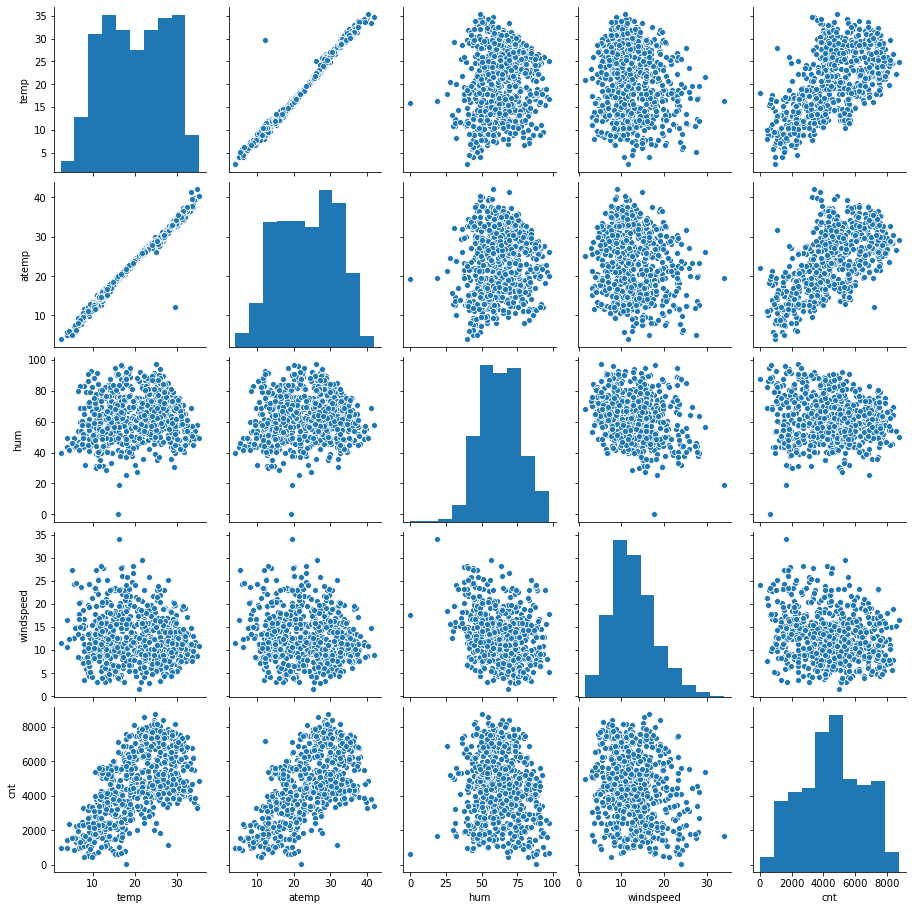

In [10]:
sns.pairplot(bike_data[['temp','atemp','hum','windspeed','cnt']])
plt.show()

## Inferences:-
    
    => Looking at pair-plot among the numerical variable the variable temp and atemp seems to have highest correlation with  the target variable cnt.
    => There seems to be linear relationship between temp,atemp,other parameters and cnt.
    => Strong correlationship temp and atemp.
    

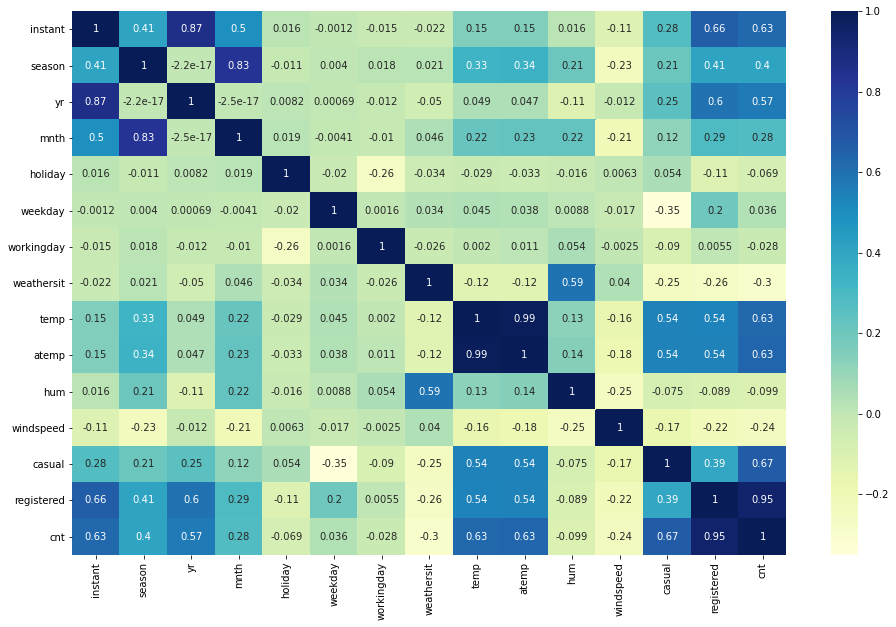

In [11]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

* In variable temp and atemp are highly positively correlated.
* Some of variable positively and some of variable negatively correlated.
* casual and register contain direct information about the bike sharing,Therefore i can remove from the feature set.

In [12]:
#from the given data instant is an index column so we drop it
bike_data.drop(['instant'],axis=1,inplace=True)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# We can see column dteday and yr month are having same data so we can drop dteday to avold the confusion
bike_data.drop(['dteday'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
#dropping casual and registered 
#we know that casual+registered =cnt and cnt is our target variable so we will not consider casual and registered
bike_data.drop(['casual','registered'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#dropping atemp
bike_data.drop(['atemp'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [16]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.8 KB


### Visualising Categorical Variables

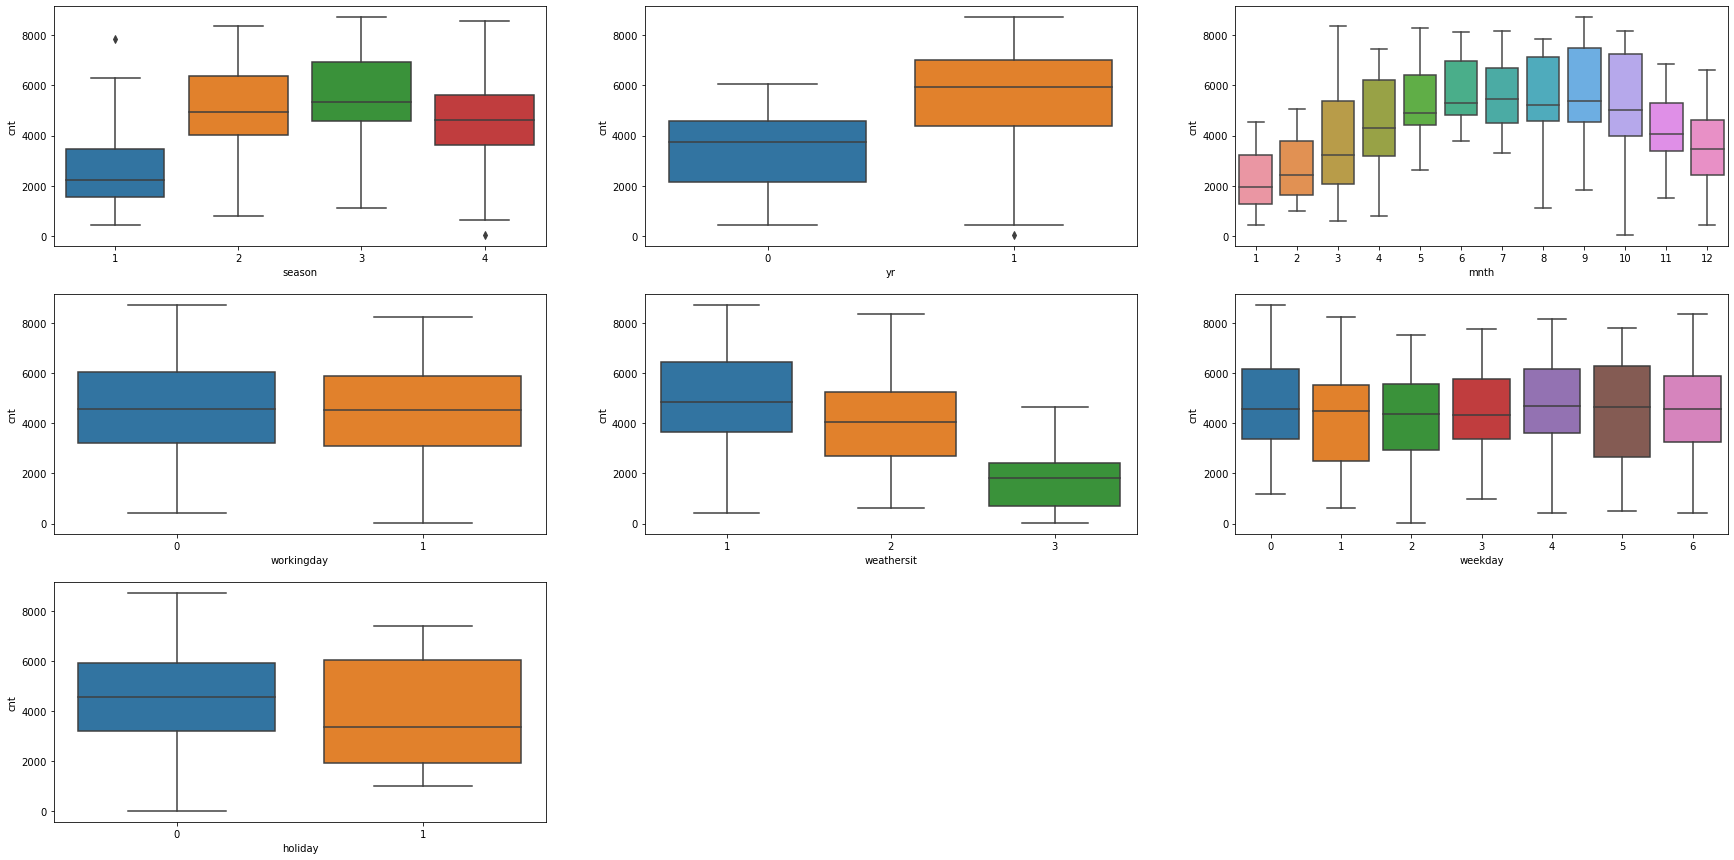

In [17]:
#Visualising categorical variable to understand data better
plt.figure(figsize=(30,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_data)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_data)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_data)
plt.subplot(3,3,4)
sns.boxplot(x='workingday',y='cnt',data=bike_data)
plt.subplot(3,3,5)
sns.boxplot(x='weathersit',y='cnt',data=bike_data)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt',data=bike_data)
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=bike_data)
plt.show()

* In season boxplot increase in bike rental count in fall and summer season and decrease in spring season.
* Their are few outlier
* In boxplot yr we can see demand of bike rental in 2019 increase as compare to 2018.
* In weathersit boxplot i can see that clear,partly coudly rental is higher.

### univariate Analysis

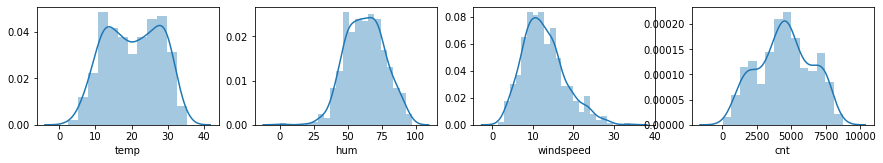

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
sns.distplot(bike_data.temp)
plt.subplot(4,4,2)
sns.distplot(bike_data.hum)
plt.subplot(4,4,3)
sns.distplot(bike_data.windspeed)
plt.subplot(4,4,4)
sns.distplot(bike_data.cnt)
plt.show()

##  Inferences:-
         
        => In temp most of the value between 10 to 30
        => In hum there are some value start from zero we need to check the value.
        => In hum most of the value lies between 40 to 80
        => In windspeed most of the value 10 to 20.


## Step 3 : Data Preparation

### Dummy variable

* Linear regression assumes that all the numerical values are independed data points.
* When we have a categorical Variable in a regression which takes more than two values ,we can represent then using dummy variable.
* The dummy variable will have only two quantitative values, 0 and 1 is easier to interpret.

In [19]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.8 KB


In [20]:
# Convert variable to object type

bike_data['mnth']=bike_data['mnth'].astype(object)
bike_data['season']=bike_data['season'].astype(object)
bike_data['weathersit']=bike_data['weathersit'].astype(object)
bike_data['weekday']=bike_data['weekday'].astype(object)

####  bike_data.info()

In [21]:
bike_data[['season']]=bike_data[['season']].apply(lambda x:x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [22]:
bike_data[['mnth']]=bike_data[['mnth']].apply(lambda x:x.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"}))
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,5,1,1,9.305237,43.6957,12.522300,1600


In [23]:
bike_data[["weekday"]]=bike_data[["weekday"]].apply(lambda x:x.map({1:"mon",2:"tue",3:"wed",4:"thur",5:"fri",6:"sat",7:"sun"}))
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,2,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,2,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,1,9.305237,43.6957,12.522300,1600


In [24]:
bike_data[["weathersit"]]=bike_data[["weathersit"]].apply(lambda x:x.map({1:"clear",2:"mist",3:"snow",4:"rain"}))
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


In [25]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     626 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 51.4+ KB


In [26]:
#Creating dummy variables
season=pd.get_dummies(bike_data['season'],drop_first=True)
mnth=pd.get_dummies(bike_data['mnth'],drop_first=True)
weekday=pd.get_dummies(bike_data['weekday'],drop_first=True)
weathersit=pd.get_dummies(bike_data['weathersit'],drop_first=True)


In [27]:
#add the result into original dataframe
bike_data=pd.concat([bike_data,season],axis=1)
bike_data=pd.concat([bike_data,mnth],axis=1)
bike_data=pd.concat([bike_data,weekday],axis=1)
bike_data=pd.concat([bike_data,weathersit],axis=1)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     626 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
 14  aug         730 non-null    uint8  
 15  dec         730 non-null    uint8  
 16  feb         730 non-null    uint8  
 17  jan         730 non-null    uint8  
 18  jul         730 non-null    uint8  
 19  jun         730 non-null    u

In [28]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,nov,oct,sep,mon,sat,thur,tue,wed,mist,snow
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thur,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Drop the categorical variable as we have created dummies for it
 
bike_data.drop(['season'],axis=1,inplace=True)
bike_data.drop(['mnth'],axis=1,inplace=True)
bike_data.drop(['weekday'],axis=1,inplace=True)
bike_data.drop(['weathersit'],axis=1,inplace=True)

In [30]:
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,mon,sat,thur,tue,wed,mist,snow
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Observe the dataframe after making of dummy variable and dropping categorical variable
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  aug         730 non-null    uint8  
 11  dec         730 non-null    uint8  
 12  feb         730 non-null    uint8  
 13  jan         730 non-null    uint8  
 14  jul         730 non-null    uint8  
 15  jun         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  may         730 non-null    uint8  
 18  nov         730 non-null    uint8  
 19  oct         730 non-null    u

* The categorical variables are converted into dummy varibles.
* Dummy variable are concatented with original dataframe.
* season,mnth,weekday,wethersit are deleted from the original dataframe.

### Split the dataset into train and test set

#### we specify random_state so that the train and test data set always have the same rows,changing random state will change the analysis and the model

In [32]:
np.random.seed(0)
df_train,df_test=train_test_split(bike_data,train_size=0.7,test_size=0.3,random_state=100)

In [33]:
# Obseve train dataset
df_train.shape

(510, 28)

In [34]:
# Observe test dataset
df_test.shape

(219, 28)

In [35]:
df_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,mon,sat,thur,tue,wed,mist,snow
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,mon,sat,thur,tue,wed,mist,snow
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,0,1,0,0,1,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'thur', 'tue', 'wed',
       'mist', 'snow'],
      dtype='object')

## Rescaling the features

There are two common techniques in scaling

1> Min-Max scaling or Normalization
 * scale all values between 0 and 1
 * computer value using (x-xmin)/(xmax-xmin)

2> Standarisation(mean=0,max=1)
  
  We will use Min-Max scaling for this problem

In [38]:
scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,mon,sat,thur,tue,wed,mist,snow
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,mon,sat,thur,tue,wed,mist,snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.086275,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.281045,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can observe that in describe output of all the variables have values between 0(min) and 1(max)

## step4: Building the model

In [40]:
# Dividing into x and y sets for the model bullding
#target variable
y_train=df_train.pop('cnt')
X_train_initial=df_train

In [41]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [42]:
X_train_initial.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,...,nov,oct,sep,mon,sat,thur,tue,wed,mist,snow
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
# Indentify the top significance feature using RFE(Recursive Elimination automated approach)
lr=LinearRegression()
# rank all feature,continue the eliminationuntil last one
rfe=RFE(lr,20)
rfe=rfe.fit(X_train_initial,y_train)

In [44]:
print(sorted(list(zip(X_train_initial.columns,rfe.support_,rfe.ranking_))))

[('aug', True, 1), ('dec', True, 1), ('feb', True, 1), ('holiday', True, 1), ('hum', True, 1), ('jan', True, 1), ('jul', True, 1), ('jun', False, 7), ('mar', False, 8), ('may', True, 1), ('mist', True, 1), ('mon', True, 1), ('nov', True, 1), ('oct', False, 5), ('sat', False, 4), ('sep', True, 1), ('snow', True, 1), ('spring', True, 1), ('summer', True, 1), ('temp', True, 1), ('thur', False, 6), ('tue', True, 1), ('wed', False, 2), ('windspeed', True, 1), ('winter', True, 1), ('workingday', False, 3), ('yr', True, 1)]


In [45]:
col=X_train_initial.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'may', 'nov', 'sep', 'mon',
       'tue', 'mist', 'snow'],
      dtype='object')

## Feature selection

Two main statistics to select the features:

p-value of the feature
VIFs.
Hypothesis of the test is that a feature is insignificant in the model and by having p-value less than 0.05, we reject this hypothesis and hence the feature is selected. So wherever the p-value of a feature is higher than 0.05, it indicates that we failed to reject the hypothesis that the feature is insignificant.

When there is a feature in the model that can be explained by other features, then the variable's VIF will be higher than 10 and we can eliminate those variables.

=>When a feature has high p-value and high VIF, then it can be dropped first.

=>When a feature has high p-value and low VIF, then we will drop it as it is not significant.

=>When a feature has low p-value and high VIF, we try to drop other features which have higher p-value and if there is none, we 
will remove this feature and build the model and check the R-squared.

=>When a feature has low p-value and low VIF, then it is significant and not explained by other features and hence we keep these features in the model.

In [46]:
X_train_sm=X_train_initial[col]

In [47]:
#Building model 
X_train_sm1=sm.add_constant(X_train_sm)
# create model
lr=sm.OLS(y_train,X_train_sm1).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          7.33e-187
Time:                        20:20:14   Log-Likelihood:                 522.45
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     489   BIC:                            -914.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3360      0.040      8.494      0.000       0.258       0.414
yr             0.2311      0.008     28.817      0.000       0.215       0.247
holiday       -0.0897      0.025     -3.526      0.000      -0.140      -0.040
temp           0.4482      0.039     11.614      0.000       0.372       0.524
hum           -0.1582      0.038     -4.175      0.000      -0.233      -0.084
windspeed     -0.1821      0.026     -7.104      0.000      -0.232      -0.132
spring        -0.0436      0.027     -1.630      0.104      -0.096       0.009
summer         0.0407      0.023      1.742      0.082      -0.005       0.087
winter         0.1125      0.023      4.946      0.000       0.068       0.157
aug            0.0186      0.024      0.785      0.433      -0.028       0.065
dec           -0.0481      0.018     -2.643      0.008      -0.084      -0.012
feb           -0.0384      0.022     -1.784      0.075      -0.081       0.004
jan           -0.0653      0.021     -3.061      0.002      -0.107      -0.023
jul           -0.0366      0.025     -1.480      0.140      -0.085       0.012
may            0.0226      0.017      1.295      0.196      -0.012       0.057
nov           -0.0472      0.019     -2.502      0.013      -0.084      -0.010
sep            0.0840      0.022      3.905      0.000       0.042       0.126
mon           -0.0260      0.011     -2.339      0.020      -0.048      -0.004
tue           -0.0273      0.011     -2.431      0.015      -0.049      -0.005
mist          -0.0585      0.010     -5.623      0.000      -0.079      -0.038
snow          -0.2516      0.026     -9.567      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       74.590   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.548
Skew:                          -0.724   Prob(JB):                     4.66e-44
Kurtosis:                       5.701   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF

In [48]:
# Create a dataframe that will contain the names of all the feature variable and their respect
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif


,Feature,VIF
3,hum,33.55
2,temp,21.18
5,spring,7.13
7,winter,5.85
6,summer,5.66
4,windspeed,4.94
8,aug,3.11
12,jul,2.78
11,jan,2.40
18,mist,2.34


Remove aug  p-value>0.05 

In [49]:
X_train_sm=X_train_sm.drop(['aug'],axis=1)

In [50]:
X_train_sm2=sm.add_constant(X_train_sm)
# create model
lr1=sm.OLS(y_train,X_train_sm2).fit()
#fit

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          8.12e-188
Time:                        20:20:30   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3464      0.037      9.297      0.000       0.273       0.420
yr             0.2313      0.008     28.862      0.000       0.216       0.247
holiday       -0.0902      0.025     -3.545      0.000      -0.140      -0.040
temp           0.4505      0.038     11.709      0.000       0.375       0.526
hum           -0.1569      0.038     -4.146      0.000      -0.231      -0.083
windspeed     -0.1822      0.026     -7.114      0.000      -0.233      -0.132
spring        -0.0554      0.022     -2.517      0.012      -0.099      -0.012
summer         0.0282      0.017      1.652      0.099      -0.005       0.062
winter         0.1015      0.018      5.673      0.000       0.066       0.137
dec           -0.0490      0.018     -2.698      0.007      -0.085      -0.013
feb           -0.0384      0.022     -1.784      0.075      -0.081       0.004
jan           -0.0653      0.021     -3.061      0.002      -0.107      -0.023
jul           -0.0498      0.018     -2.754      0.006      -0.085      -0.014
may            0.0221      0.017      1.271      0.204      -0.012       0.056
nov           -0.0484      0.019     -2.573      0.010      -0.085      -0.011
sep            0.0734      0.017      4.388      0.000       0.041       0.106
mon           -0.0258      0.011     -2.318      0.021      -0.048      -0.004
tue           -0.0275      0.011     -2.450      0.015      -0.050      -0.005
mist          -0.0581      0.010     -5.598      0.000      -0.079      -0.038
snow          -0.2526      0.026     -9.621      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       75.657   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.065
Skew:                          -0.735   Prob(JB):                     1.32e-44
Kurtosis:                       5.711   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
3,hum,31.88
2,temp,18.42
5,spring,5.45
4,windspeed,4.87
7,winter,4.08
6,summer,3.34
10,jan,2.38
17,mist,2.34
0,yr,2.10
9,feb,1.92


remove hum has high VIF

In [52]:
X_train_sm=X_train_sm.drop(['hum'],axis=1)

In [53]:
X_train_sm3=sm.add_constant(X_train_sm)
# create model
lr2=sm.OLS(y_train,X_train_sm3).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.91e-185
Time:                        20:20:39   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -988.7
Df Residuals:                     491   BIC:                            -908.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2729      0.033      8.193      0.000       0.207       0.338
yr             0.2350      0.008     29.028      0.000       0.219       0.251
holiday       -0.0908      0.026     -3.512      0.000      -0.142      -0.040
temp           0.4119      0.038     10.857      0.000       0.337       0.486
windspeed     -0.1539      0.025     -6.133      0.000      -0.203      -0.105
spring        -0.0625      0.022     -2.800      0.005      -0.106      -0.019
summer         0.0248      0.017      1.430      0.153      -0.009       0.059
winter         0.0884      0.018      4.937      0.000       0.053       0.124
dec           -0.0565      0.018     -3.072      0.002      -0.093      -0.020
feb           -0.0407      0.022     -1.863      0.063      -0.084       0.002
jan           -0.0725      0.022     -3.356      0.001      -0.115      -0.030
jul           -0.0446      0.018     -2.429      0.015      -0.081      -0.009
may            0.0132      0.018      0.750      0.454      -0.021       0.048
nov           -0.0491      0.019     -2.568      0.011      -0.087      -0.012
sep            0.0670      0.017      3.956      0.000       0.034       0.100
mon           -0.0266      0.011     -2.349      0.019      -0.049      -0.004
tue           -0.0313      0.011     -2.758      0.006      -0.054      -0.009
mist          -0.0829      0.009     -9.595      0.000      -0.100      -0.066
snow          -0.2969      0.024    -12.187      0.000      -0.345      -0.249
==============================================================================
Omnibus:                       77.158   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.385
Skew:                          -0.752   Prob(JB):                     4.15e-45
Kurtosis:                       5.712   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
2,temp,5.40
3,windspeed,4.80
4,spring,4.36
6,winter,3.03
5,summer,2.81
9,jan,2.21
0,yr,2.09
8,feb,1.88
12,nov,1.82
10,jul,1.61


Remove may  p-value>0.05

In [55]:
X_train_sm=X_train_sm.drop(['may'],axis=1)

In [56]:
X_train_sm4=sm.add_constant(X_train_sm)
# create model
lr3=sm.OLS(y_train,X_train_sm4).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.1
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.02e-186
Time:                        20:20:43   Log-Likelihood:                 513.04
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     492   BIC:                            -913.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2687      0.033      8.188      0.000       0.204       0.333
yr             0.2346      0.008     29.055      0.000       0.219       0.250
holiday       -0.0913      0.026     -3.534      0.000      -0.142      -0.041
temp           0.4180      0.037     11.283      0.000       0.345       0.491
windspeed     -0.1555      0.025     -6.223      0.000      -0.205      -0.106
spring        -0.0601      0.022     -2.722      0.007      -0.104      -0.017
summer         0.0306      0.015      1.980      0.048       0.000       0.061
winter         0.0899      0.018      5.058      0.000       0.055       0.125
dec           -0.0555      0.018     -3.029      0.003      -0.092      -0.020
feb           -0.0398      0.022     -1.827      0.068      -0.083       0.003
jan           -0.0714      0.022     -3.313      0.001      -0.114      -0.029
jul           -0.0449      0.018     -2.451      0.015      -0.081      -0.009
nov           -0.0481      0.019     -2.524      0.012      -0.086      -0.011
sep            0.0671      0.017      3.966      0.000       0.034       0.100
mon           -0.0269      0.011     -2.383      0.018      -0.049      -0.005
tue           -0.0315      0.011     -2.773      0.006      -0.054      -0.009
mist          -0.0824      0.009     -9.570      0.000      -0.099      -0.065
snow          -0.2970      0.024    -12.195      0.000      -0.345      -0.249
==============================================================================
Omnibus:                       76.127   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.075
Skew:                          -0.751   Prob(JB):                     2.65e-43
Kurtosis:                       5.640   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
2,temp,5.28
3,windspeed,4.71
4,spring,4.35
6,winter,3.03
5,summer,2.24
9,jan,2.21
0,yr,2.08
8,feb,1.88
11,nov,1.82
10,jul,1.61


Remove feb  p-value>0.05

In [58]:
X_train_sm=X_train_sm.drop(['feb'],axis=1)

In [59]:
X_train_sm5=sm.add_constant(X_train_sm)
# create model
lr4=sm.OLS(y_train,X_train_sm5).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.20e-186
Time:                        20:20:47   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     493   BIC:                            -916.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2544      0.032      7.963      0.000       0.192       0.317
yr             0.2343      0.008     28.953      0.000       0.218       0.250
holiday       -0.0939      0.026     -3.633      0.000      -0.145      -0.043
temp           0.4352      0.036     12.120      0.000       0.365       0.506
windspeed     -0.1537      0.025     -6.143      0.000      -0.203      -0.105
spring        -0.0712      0.021     -3.343      0.001      -0.113      -0.029
summer         0.0342      0.015      2.227      0.026       0.004       0.064
winter         0.0917      0.018      5.156      0.000       0.057       0.127
dec           -0.0454      0.018     -2.592      0.010      -0.080      -0.011
jan           -0.0502      0.018     -2.758      0.006      -0.086      -0.014
jul           -0.0460      0.018     -2.502      0.013      -0.082      -0.010
nov           -0.0427      0.019     -2.266      0.024      -0.080      -0.006
sep            0.0687      0.017      4.057      0.000       0.035       0.102
mon           -0.0263      0.011     -2.320      0.021      -0.048      -0.004
tue           -0.0317      0.011     -2.788      0.006      -0.054      -0.009
mist          -0.0824      0.009     -9.551      0.000      -0.099      -0.065
snow          -0.2961      0.024    -12.133      0.000      -0.344      -0.248
==============================================================================
Omnibus:                       70.950   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.792
Skew:                          -0.707   Prob(JB):                     9.09e-40
Kurtosis:                       5.542   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
2,temp,5.23
3,windspeed,4.70
6,winter,2.98
4,spring,2.92
5,summer,2.24
0,yr,2.08
10,nov,1.80
8,jan,1.66
9,jul,1.60
14,mist,1.56


Remove summer p-value>0.05

In [61]:
X_train_sm=X_train_sm.drop(['summer'],axis=1)

In [62]:
X_train_sm6=sm.add_constant(X_train_sm)
# create model
lr5=sm.OLS(y_train,X_train_sm6).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.3
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.04e-186
Time:                        20:20:51   Log-Likelihood:                 508.77
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     494   BIC:                            -917.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2983      0.025     11.810      0.000       0.249       0.348
yr             0.2348      0.008     28.910      0.000       0.219       0.251
holiday       -0.0934      0.026     -3.599      0.000      -0.144      -0.042
temp           0.3992      0.032     12.404      0.000       0.336       0.462
windspeed     -0.1491      0.025     -5.954      0.000      -0.198      -0.100
spring        -0.1038      0.015     -6.699      0.000      -0.134      -0.073
winter         0.0673      0.014      4.785      0.000       0.040       0.095
dec           -0.0520      0.017     -2.999      0.003      -0.086      -0.018
jan           -0.0557      0.018     -3.075      0.002      -0.091      -0.020
jul           -0.0604      0.017     -3.499      0.001      -0.094      -0.026
nov           -0.0499      0.019     -2.672      0.008      -0.087      -0.013
sep            0.0537      0.016      3.444      0.001       0.023       0.084
mon           -0.0266      0.011     -2.344      0.019      -0.049      -0.004
tue           -0.0308      0.011     -2.698      0.007      -0.053      -0.008
mist          -0.0822      0.009     -9.484      0.000      -0.099      -0.065
snow          -0.2980      0.024    -12.171      0.000      -0.346      -0.250
==============================================================================
Omnibus:                       71.420   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.448
Skew:                          -0.695   Prob(JB):                     4.41e-42
Kurtosis:                       5.651   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
2,temp,4.76
3,windspeed,4.11
5,winter,2.57
4,spring,2.38
0,yr,2.07
9,nov,1.80
7,jan,1.65
13,mist,1.53
6,dec,1.46
8,jul,1.36


In [64]:
X_train_sm=X_train_sm.drop(['mon'],axis=1)

In [65]:
X_train_sm7=sm.add_constant(X_train_sm)
# create model
lr6=sm.OLS(y_train,X_train_sm7).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.14e-186
Time:                        20:20:56   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     495   BIC:                            -918.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2924      0.025     11.582      0.000       0.243       0.342
yr             0.2353      0.008     28.849      0.000       0.219       0.251
holiday       -0.0893      0.026     -3.434      0.001      -0.140      -0.038
temp           0.4016      0.032     12.429      0.000       0.338       0.465
windspeed     -0.1515      0.025     -6.029      0.000      -0.201      -0.102
spring        -0.1031      0.016     -6.627      0.000      -0.134      -0.073
winter         0.0668      0.014      4.731      0.000       0.039       0.095
dec           -0.0523      0.017     -3.006      0.003      -0.087      -0.018
jan           -0.0563      0.018     -3.099      0.002      -0.092      -0.021
jul           -0.0621      0.017     -3.585      0.000      -0.096      -0.028
nov           -0.0497      0.019     -2.650      0.008      -0.087      -0.013
sep            0.0539      0.016      3.438      0.001       0.023       0.085
tue           -0.0259      0.011     -2.297      0.022      -0.048      -0.004
mist          -0.0814      0.009     -9.356      0.000      -0.098      -0.064
snow          -0.2979      0.025    -12.112      0.000      -0.346      -0.250
==============================================================================
Omnibus:                       73.144   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.971
Skew:                          -0.722   Prob(JB):                     9.24e-42
Kurtosis:                       5.609   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
2,temp,4.69
3,windspeed,4.07
5,winter,2.56
4,spring,2.37
0,yr,2.07
9,nov,1.80
7,jan,1.65
12,mist,1.53
6,dec,1.46
8,jul,1.36


Remove tue  p-value>0.05

In [67]:
X_train_sm=X_train_sm.drop(['tue'],axis=1)

In [68]:
X_train_sm8=sm.add_constant(X_train_sm)
# create model
lr7=sm.OLS(y_train,X_train_sm8).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.08e-186
Time:                        20:21:00   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.025     11.427      0.000       0.240       0.339
yr             0.2348      0.008     28.679      0.000       0.219       0.251
holiday       -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temp           0.4026      0.032     12.407      0.000       0.339       0.466
windspeed     -0.1540      0.025     -6.108      0.000      -0.204      -0.104
spring        -0.1034      0.016     -6.613      0.000      -0.134      -0.073
winter         0.0650      0.014      4.588      0.000       0.037       0.093
dec           -0.0510      0.017     -2.918      0.004      -0.085      -0.017
jan           -0.0556      0.018     -3.047      0.002      -0.091      -0.020
jul           -0.0643      0.017     -3.705      0.000      -0.098      -0.030
nov           -0.0488      0.019     -2.593      0.010      -0.086      -0.012
sep            0.0537      0.016      3.409      0.001       0.023       0.085
mist          -0.0812      0.009     -9.297      0.000      -0.098      -0.064
snow          -0.2949      0.025    -11.954      0.000      -0.343      -0.246
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,nov,1.80
7,jan,1.65
11,mist,1.53
6,dec,1.46
8,jul,1.36


Remove nov  p-value>0.05

In [70]:
X_train_sm=X_train_sm.drop(['nov'],axis=1)

In [71]:
X_train_sm9=sm.add_constant(X_train_sm)
# create model
lr8=sm.OLS(y_train,X_train_sm9).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.02e-186
Time:                        20:21:05   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2769      0.025     11.074      0.000       0.228       0.326
yr             0.2348      0.008     28.510      0.000       0.219       0.251
holiday       -0.0994      0.026     -3.812      0.000      -0.151      -0.048
temp           0.4200      0.032     13.153      0.000       0.357       0.483
windspeed     -0.1542      0.025     -6.079      0.000      -0.204      -0.104
spring        -0.0997      0.016     -6.369      0.000      -0.130      -0.069
winter         0.0482      0.013      3.804      0.000       0.023       0.073
dec           -0.0340      0.016     -2.086      0.037      -0.066      -0.002
jan           -0.0506      0.018     -2.769      0.006      -0.086      -0.015
jul           -0.0671      0.017     -3.849      0.000      -0.101      -0.033
sep            0.0575      0.016      3.649      0.000       0.027       0.088
mist          -0.0802      0.009     -9.144      0.000      -0.097      -0.063
snow          -0.2904      0.025    -11.735      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       62.888   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.760
Skew:                          -0.643   Prob(JB):                     6.74e-34
Kurtosis:                       5.353   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,jan,1.64
10,mist,1.53
8,jul,1.36
6,dec,1.29
9,sep,1.20


Remove 'dec'  p-value>0.05

In [73]:
X_train_sm=X_train_sm.drop(['dec'],axis=1)

In [74]:
X_train_sm10=sm.add_constant(X_train_sm)
# create model
lr9=sm.OLS(y_train,X_train_sm10).fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.13e-186
Time:                        20:21:09   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2657      0.025     10.843      0.000       0.218       0.314
yr             0.2348      0.008     28.426      0.000       0.219       0.251
holiday       -0.0977      0.026     -3.738      0.000      -0.149      -0.046
temp           0.4335      0.031     13.817      0.000       0.372       0.495
windspeed     -0.1482      0.025     -5.863      0.000      -0.198      -0.099
spring        -0.1013      0.016     -6.459      0.000      -0.132      -0.071
winter         0.0432      0.012      3.462      0.001       0.019       0.068
jan           -0.0427      0.018     -2.382      0.018      -0.078      -0.007
jul           -0.0693      0.017     -3.967      0.000      -0.104      -0.035
sep            0.0587      0.016      3.710      0.000       0.028       0.090
mist          -0.0802      0.009     -9.106      0.000      -0.097      -0.063
snow          -0.2877      0.025    -11.601      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
6,jan,1.60
9,mist,1.53
5,winter,1.40
7,jul,1.36
8,sep,1.20
10,snow,1.08


Remove 'jan'  p-value>0.05

In [76]:
X_train_sm=X_train_sm.drop(['jan'],axis=1)

In [77]:
X_train_sm11=sm.add_constant(X_train_sm)
# create model
lr10=sm.OLS(y_train,X_train_sm11).fit()
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.16e-186
Time:                        20:21:13   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.024     10.530      0.000       0.205       0.299
yr             0.2341      0.008     28.224      0.000       0.218       0.250
holiday       -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp           0.4515      0.031     14.758      0.000       0.391       0.512
windspeed     -0.1398      0.025     -5.559      0.000      -0.189      -0.090
spring        -0.1108      0.015     -7.265      0.000      -0.141      -0.081
winter         0.0473      0.012      3.804      0.000       0.023       0.072
jul           -0.0727      0.017     -4.160      0.000      -0.107      -0.038
sep            0.0577      0.016      3.635      0.000       0.027       0.089
mist          -0.0811      0.009     -9.182      0.000      -0.098      -0.064
snow          -0.2864      0.025    -11.499      0.000      -0.335      -0.237
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif=pd.DataFrame()
X_train=X_train_sm
vif['Feature']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
8,mist,1.51
5,winter,1.40
6,jul,1.35
7,sep,1.20
9,snow,1.08
1,holiday,1.04


## Interpreting the regression results

* R-squared of the model(83.3%) and adjusted R-squared(83%) indicate that the selected 10 feature are significant for       prediction.
* P value of the model is close to 0.
* coefficient of the features indicates how they are related with cnt.


## Top 3 significant features that contributed towards explaining towards the demand of the bikes:-


1. yr with coeffiecient 0.234 indicating that the bike demand has incresed from last year and it is expected to increase in future.
2. temp with coefficient 0.451 indicating as temperture increases,the demand of bikes increase.
3. Snow with coefficient -0.2864 indicating there is snow ,less demand of bikes.

## Residual Analysis 

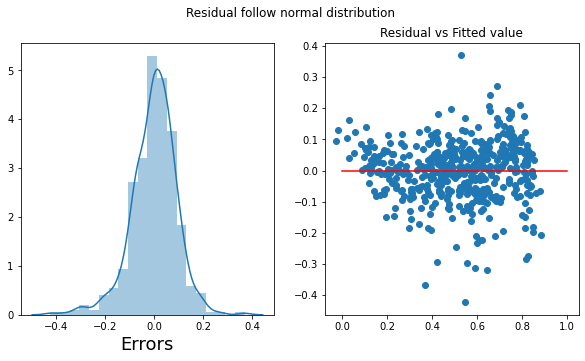

In [111]:
# plot the histogram for error terms
y_train_pred=lr10.predict(X_train_sm11)
res=y_train-y_train_pred
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot((res),bins=20)                 
plt.xlabel('Errors', fontsize = 18)
plt.suptitle('Residual follow normal distribution')
plt.subplot(122)
plt.scatter(y_train_pred,res)
plt.plot([0,0],'r')
plt.title("Residual vs Fitted value")
plt.show()


 * From the plot,it can be proved that residual follow normal distribution and centred around zero.
*  In Second plot Residual do not follow any pattern,error terms are independed.

 There are following assumptions of Linear regression after building the                                                        model on training set:-
1.	Linear relationship between X and Y
2. Error terms are normally distributed.
3.  Error term are independent to each other.
4.  Error terms has constant   variance (homoscedasticity)


### Scaling the numerical feature on the test dataset

In [80]:
num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,mon,sat,thur,tue,wed,mist,snow
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,1,0,0,1,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,nov,oct,sep,mon,sat,thur,tue,wed,mist,snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.073059,0.082192,0.086758,0.118721,0.173516,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.260830,0.275286,0.282125,0.324202,0.379560,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y_test=df_test.pop('cnt')
X_test=df_test

In [83]:
# add constant

X_test_new=X_test[X_train_sm.columns]
X_test_new=sm.add_constant(X_test_new)


In [84]:
X_train_sm.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'jul', 'sep',
       'mist', 'snow'],
      dtype='object')

In [85]:
X_test_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'jul', 'sep', 'mist', 'snow'],
      dtype='object')

In [87]:
#Prediction
y_test_pred=lr10.predict(X_test_new)

In [89]:
rmse = sqrt(mean_squared_error(y_test,y_test_pred))
rmse

0.09574033200511815

In [90]:
mae=mean_absolute_error(y_test,y_test_pred)
mae

0.07165668005653539

In [92]:
train_r2 = round(r2_score(y_train, y_train_pred),3)
train_r2

0.833

In [93]:
test_r2 = round(r2_score(y_test, y_test_pred),3)
test_r2

0.807

In [105]:
n = df_train.shape[0]
p = len(X_train_sm.columns)

In [106]:
#Adj. R-squared value in train 
round(1-(1-train_r2)*(n-1)/(n-p-1),3) 

0.83

In [107]:
n = df_test.shape[0]
p = len(X_test_new.columns)

In [108]:
# r-adjusted in test dataset 
round(1-(1-test_r2)*(n-1)/(n-p-1),4)

0.7967

In [104]:
lr10.params

const        0.251899
yr           0.234092
holiday     -0.098556
temp         0.451455
windspeed   -0.139817
spring      -0.110795
winter       0.047278
jul         -0.072719
sep          0.057705
mist        -0.081133
snow        -0.286408
dtype: float64

The differnce between r2 score of train and test dataset less then 5 percent,hence this model is good for prediction.

Equation for best fitted line is
### cnt=0.251899+0.234092/times yr-0.98556/times holiday+0.451455/times temp-0.139817/times windspeed-0.110795/times spring+0.047278/times winter-0.072719/times jul+0.057705/times sep-0.081133/times mist-0.286408/times snow

### Final Assumption:-


Rental bike is on demand- in september month,when the sky is clear,in winter season, on working days.


### suggestion

According to the year the demand of rental bike is increasing  hence corona pendemic effect has gone the demand of rental bikes will increase.